# PARTIE 3-2 : Deep Learning

In [94]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import *

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns; sns.set()  # for plot styling
from scipy.stats import mode
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from time import time

In [95]:
X = np.load("./MNIST_X_28x28.npy")
y = np.load("./MNIST_y.npy")

In [96]:
n_features = 784
num_classes = 10
batch_size = 64
epochs = 15
image_shape = (X.shape[1],X.shape[2],1)

In [97]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_ftrain = X_train.flatten().reshape(X_train.shape[0], n_features)/255.0
X_ftest  = X_test.flatten().reshape(X_test.shape[0], n_features)/255.0

# Dense model

In [98]:
input_layer = tf.keras.layers.Input(shape=(n_features,))
x = tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.002))(input_layer)
x = tf.keras.layers.Dense(num_classes)(x)
output_layer = tf.keras.layers.Softmax()(x)
model=Model(input_layer, output_layer)

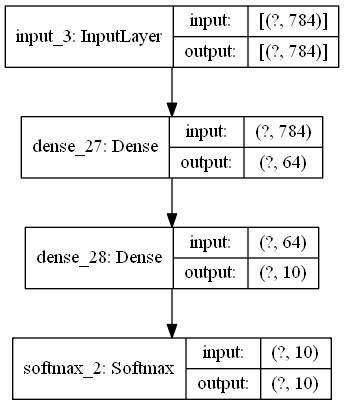

In [99]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [100]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_ftrain, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.2)

test_scores = model.evaluate(X_ftest, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train on 39200 samples, validate on 9800 samples
Epoch 1/15
39200/39200 [==============================] - 4s 96us/sample - loss: 1.7273 - accuracy: 0.8708 - val_loss: 1.6417 - val_accuracy: 0.9101
Epoch 2/15
39200/39200 [==============================] - 3s 88us/sample - loss: 1.6303 - accuracy: 0.9099 - val_loss: 1.6181 - val_accuracy: 0.9142
Epoch 3/15
39200/39200 [==============================] - 4s 99us/sample - loss: 1.6110 - accuracy: 0.9169 - val_loss: 1.6079 - val_accuracy: 0.9164
Epoch 4/15
39200/39200 [==============================] - 3s 84us/sample - loss: 1.5995 - accuracy: 0.9219 - val_loss: 1.5973 - val_accuracy: 0.9216
Epoch 5/15
39200/39200 [==============================] - 4s 89us/sample - loss: 1.5908 - accuracy: 0.9259 - val_loss: 1.5864 - val_accuracy: 0.9321
Epoch 6/15
39200/39200 [==============================] - 4s 92us/sample - loss: 1.5836 - accuracy: 0.9319 - val_loss: 1.5819 - val_accuracy: 0.9314
Epoch 7/15
39200/39200 [==============================] -

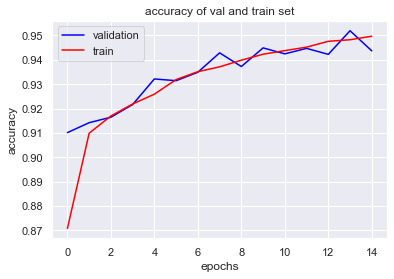

In [102]:
tab_epochs = np.arange(epochs)
plt.plot(tab_epochs, history.history['val_accuracy'], c = 'blue', label = 'validation')
plt.plot(tab_epochs, history.history['accuracy'], c = 'red', label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy of val and train set')
plt.legend()
plt.show()

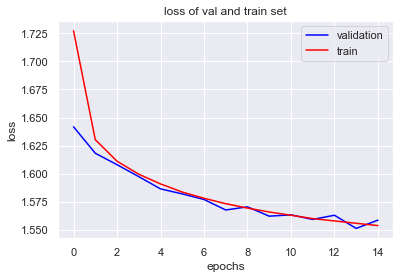

In [103]:
tab_epochs = np.arange(epochs)
plt.plot(tab_epochs, history.history['val_loss'], c = 'blue', label = 'validation')
plt.plot(tab_epochs, history.history['loss'], c = 'red', label = 'train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss of val and train set')
plt.legend()
plt.show()

# CNN

In [104]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [125]:
input_layer = tf.keras.layers.Input(shape=image_shape, name="CNN_model_img")
x = tf.keras.layers.Conv2D(32, kernel_size=3,activation='relu')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, kernel_size=3,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, kernel_size=5,activation='relu', padding='same', strides=2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(64, kernel_size=3,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=3,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=5,activation='relu', padding='same', strides=2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(128, kernel_size=4,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output_layer= tf.keras.layers.Dense(num_classes, activation = 'softmax')(x)
model=Model(input_layer, output_layer) 

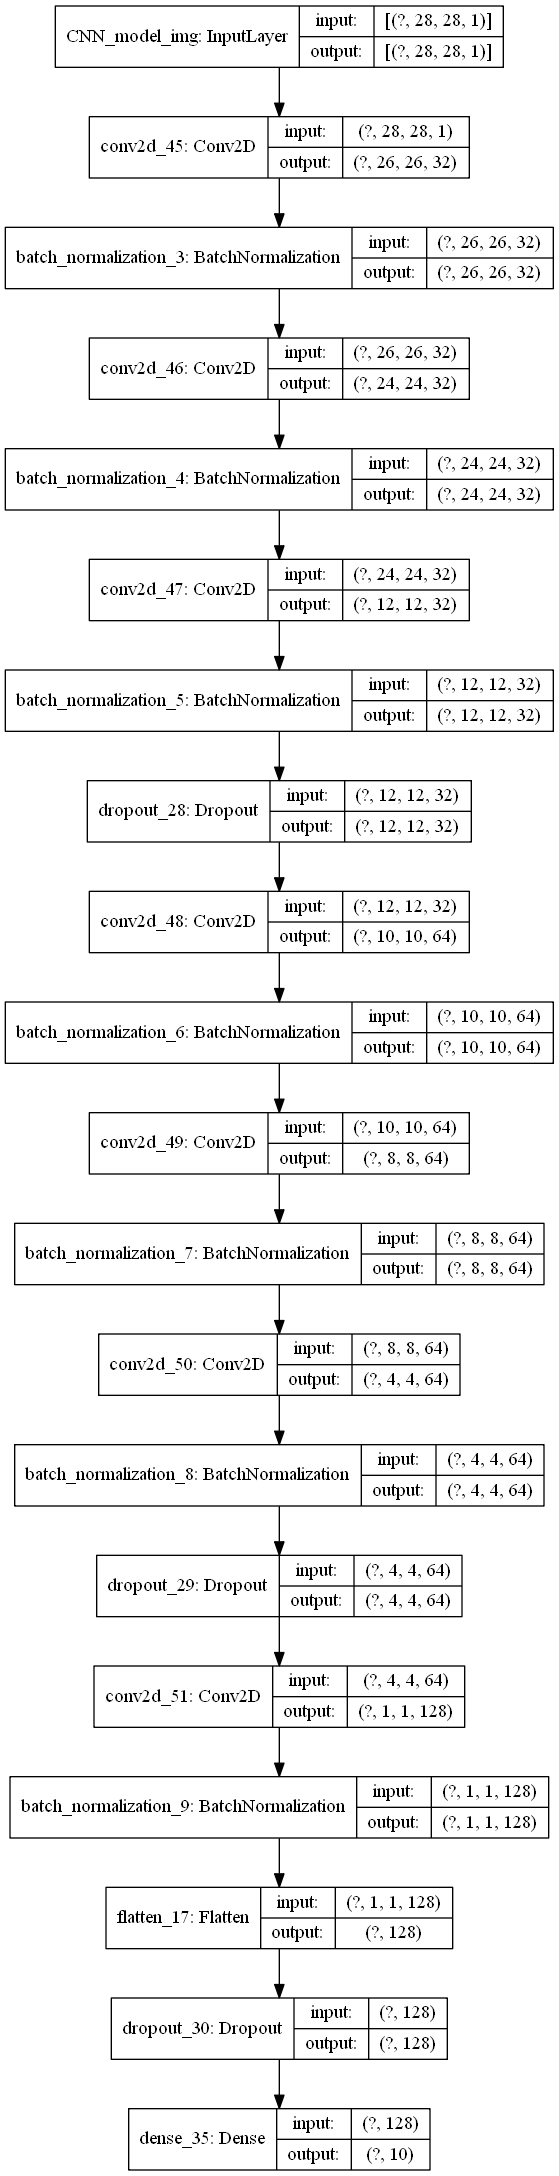

In [126]:
tf.keras.utils.plot_model(model, "CNN_model.png", show_shapes=True)

In [127]:
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_model_img (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 32)        128

In [128]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
    #optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True), #nesterov change la formule de l'optimisateur et c'est efficace
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train on 39200 samples, validate on 9800 samples
Epoch 1/15
39200/39200 [==============================] - 13s 335us/sample - loss: 0.2741 - accuracy: 0.9160 - val_loss: 0.0556 - val_accuracy: 0.9837
Epoch 2/15
39200/39200 [==============================] - 11s 280us/sample - loss: 0.0766 - accuracy: 0.9774 - val_loss: 0.0415 - val_accuracy: 0.9872
Epoch 3/15
39200/39200 [==============================] - 12s 310us/sample - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0397 - val_accuracy: 0.9879
Epoch 4/15
39200/39200 [==============================] - 12s 306us/sample - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0360 - val_accuracy: 0.9896
Epoch 5/15
39200/39200 [==============================] - 12s 314us/sample - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 6/15
39200/39200 [==============================] - 12s 297us/sample - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0345 - val_accuracy: 0.9904
Epoch 7/15
39200/39200 [=====================

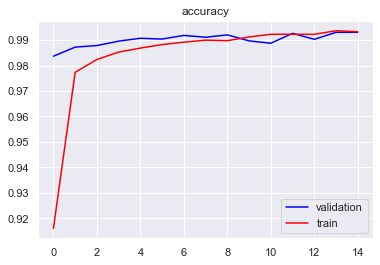

In [129]:
plt.plot(tab_epochs, history.history['val_accuracy'], c = 'blue', label = 'validation')
plt.plot(tab_epochs, history.history['accuracy'], c = 'red', label = 'train')
plt.title('accuracy')
plt.legend()
plt.show()

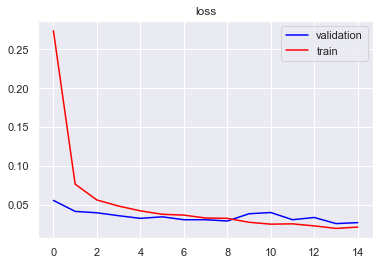

In [130]:
plt.plot(tab_epochs, history.history['val_loss'], c = 'blue', label = 'validation')
plt.plot(tab_epochs, history.history['loss'], c = 'red', label = 'train')
plt.title('loss')
plt.legend()
plt.show()